# 500_RQ1_Analysis

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [3]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [4]:
RQ1

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown
0,Lionel Messi,FC Barcelona,Spanish Primera Division,30,Argentina,Forward,93,93,105000000.0,False,8.255952,7.375000,32.0,True,False
1,Cristiano Ronaldo,Real Madrid CF,Spanish Primera Division,32,Portugal,Forward,94,94,95500000.0,False,7.926829,7.280000,25.0,True,False
2,Luis Suarez,FC Barcelona,Spanish Primera Division,30,Uruguay,Forward,92,92,97000000.0,False,7.018182,6.535714,28.0,True,False
3,Zlatan Ibrahimovic,Manchester United,English Premier League,35,Sweden,Forward,88,88,27000000.0,False,6.900000,1.200000,5.0,True,False
4,Robert Lewandowski,FC Bayern Munich,German Bundesliga,28,Poland,Forward,91,91,92000000.0,False,6.050000,6.814815,27.0,True,False
5,Edinson Cavani,Paris Saint-Germain,French Ligue 1,30,Uruguay,Forward,87,87,48500000.0,False,5.544910,0.000000,0.0,True,False
6,Sergio Aguero,Manchester City,English Premier League,29,Argentina,Forward,89,89,66500000.0,False,5.496599,6.720000,25.0,True,False
7,Gareth Bale,Real Madrid CF,Spanish Primera Division,27,Wales,Midfielder,89,89,69500000.0,True,5.451128,4.318182,22.0,True,False
8,Pierre Emerick Aubameyang,Borussia Dortmund,German Bundesliga,28,Gabon,Forward,88,88,61000000.0,False,5.393939,0.000000,0.0,True,False
9,Gonzalo Higuain,Juventus,Italian Serie A,29,Argentina,Forward,90,90,77000000.0,False,5.388235,4.833333,30.0,True,False


In [5]:
RQ1.groupby(['overall']).count()['Players']

overall
62      1
63      3
64      6
65      9
66      8
67     17
68     28
69     42
70     73
71     97
72    137
73    146
74    151
75    157
76    141
77    164
78    101
79    107
80     96
81     61
82     83
83     52
84     28
85     22
86     18
87     10
88     14
89      8
90      5
91      1
92      3
93      1
94      1
Name: Players, dtype: int64

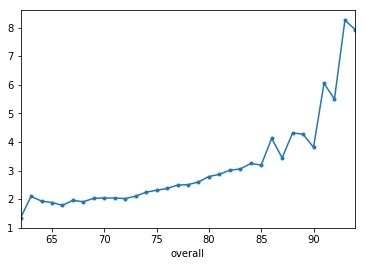

In [6]:
o = RQ1.groupby(['overall']).mean()['Previous Average Form']
o.plot(style='.-')

In [7]:
RQ1['Previous Average Form'].corr(RQ1['overall'])

0.61854072490897671

## Goalkeepers

In [8]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

In [9]:
RQ1_Goalkeepers.groupby(['overall']).count()['Players']

overall
66     3
67     1
68     1
69     1
70     5
71     3
72     9
73     3
74    13
75     7
76     6
77    11
78     5
79    11
80    10
81     8
82    12
83     7
84     4
85     5
86     1
87     1
88     2
89     2
90     1
92     1
Name: Players, dtype: int64

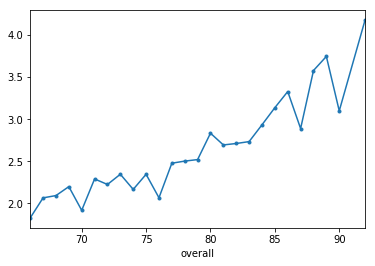

In [10]:
gk = RQ1_Goalkeepers.groupby(['overall']).mean()['Previous Average Form']
gk.plot(style='.-')

In [11]:
RQ1_Goalkeepers['Previous Average Form'].corr(RQ1_Goalkeepers['overall'])

0.68849995414859944

In [12]:
RQ1_Goalkeepers.groupby(['overall']).count()['Players']

overall
66     3
67     1
68     1
69     1
70     5
71     3
72     9
73     3
74    13
75     7
76     6
77    11
78     5
79    11
80    10
81     8
82    12
83     7
84     4
85     5
86     1
87     1
88     2
89     2
90     1
92     1
Name: Players, dtype: int64

In [13]:
worldclass_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']>84]
average_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']<85]

In [14]:
x = worldclass_goalkeepers['overall'].values[:,np.newaxis]
y = worldclass_goalkeepers['Previous Average Form'].values
worldclass_goalkeepers_model = LinearRegression()
worldclass_goalkeepers_model.fit(x, y)

w = average_goalkeepers['overall'].values[:,np.newaxis]
z = average_goalkeepers['Previous Average Form'].values
average_goalkeepers_model = LinearRegression()
average_goalkeepers_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

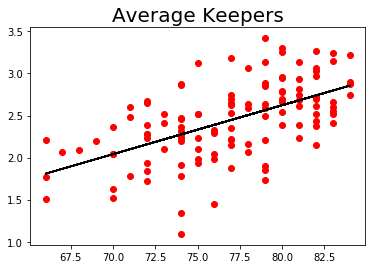

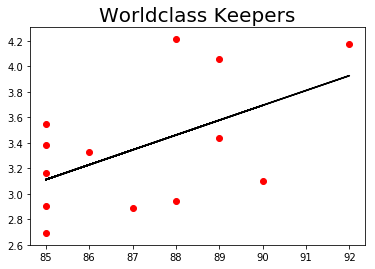

In [15]:
plt.scatter(w, z,color='r')
plt.plot(w, average_goalkeepers_model.predict(w),color='k')
plt.title('Average Keepers', fontsize=20)
plt.show()

plt.scatter(x, y,color='r')
plt.plot(x, worldclass_goalkeepers_model.predict(x),color='k')
plt.title('Worldclass Keepers', fontsize=20)
plt.show()

In [16]:
average_goalkeepers["Distance"] = average_goalkeepers['Previous Average Form'].values - average_goalkeepers_model.predict(average_goalkeepers['overall'].values[:,np.newaxis])
worldclass_goalkeepers["Distance"] = worldclass_goalkeepers['Previous Average Form'].values - worldclass_goalkeepers_model.predict(worldclass_goalkeepers['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
pos_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']>=0]['Distance'].mean()
pos_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>=0]['Distance'].mean()

neg_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']<0]['Distance'].mean()
neg_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<0]['Distance'].mean()

In [18]:
underrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']>(pos_dist_gk0*2)]
underrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>pos_dist_gk1]

overrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']<(neg_dist_gk0*2)]
overrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<neg_dist_gk1]

In [19]:
underrated_average_gk['Predicted Form (FIFA)'] = average_goalkeepers_model.predict(underrated_average_gk['overall'].values[:,np.newaxis])
underrated_worldclass_gk['Predicted Form (FIFA)'] = worldclass_goalkeepers_model.predict(underrated_worldclass_gk['overall'].values[:,np.newaxis])

overrated_average_gk['Predicted Form (FIFA)'] = average_goalkeepers_model.predict(overrated_average_gk['overall'].values[:,np.newaxis])
overrated_worldclass_gk['Predicted Form (FIFA)'] = worldclass_goalkeepers_model.predict(overrated_worldclass_gk['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [20]:
underrated_average_gk['Predicted Form (Us)'] = underrated_average_gk['Previous Average Form']
underrated_worldclass_gk['Predicted Form (Us)'] = underrated_worldclass_gk['Previous Average Form']

overrated_average_gk['Predicted Form (Us)'] = overrated_average_gk['Previous Average Form']
overrated_worldclass_gk['Predicted Form (Us)'] = overrated_worldclass_gk['Previous Average Form']

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [21]:
underrated_goalkeepers = pd.concat([underrated_average_gk ,underrated_worldclass_gk ],axis=0)

overrated_goalkeepers = pd.concat([overrated_average_gk ,overrated_worldclass_gk ],axis=0)

In [22]:
underrated_goalkeepers.sort_values('Distance', ascending=False).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Salvatore Sirigu,Torino,Italian Serie A,30,Italy,Goalkeeper,79,79,8000000.0,False,3.417323,2.969697,33.0,True,True,0.852747,2.564576,3.417323
1,Yohann Pele,Olympique de Marseille,French Ligue 1,34,France,Goalkeeper,75,75,2700000.0,False,3.125000,0.000000,0.0,True,True,0.792946,2.332054,3.125000
2,Jan Oblak,Atletico Madrid,Spanish Primera Division,24,Slovenia,Goalkeeper,88,93,57000000.0,False,4.215190,4.545455,33.0,True,False,0.754070,3.461120,4.215190
3,Fraser Forster,Southampton,English Premier League,29,England,Goalkeeper,77,78,7000000.0,False,3.186047,2.350000,20.0,True,True,0.737731,2.448315,3.186047
4,Vincent Enyeama,LOSC Lille,French Ligue 1,34,Nigeria,Goalkeeper,80,80,6000000.0,False,3.300699,0.000000,0.0,True,False,0.677993,2.622706,3.300699
5,Alphonse Areola,Paris Saint-Germain,French Ligue 1,24,France,Goalkeeper,80,86,15000000.0,False,3.258824,0.000000,0.0,True,True,0.636117,2.622706,3.258824
6,Joel Robles,Everton,English Premier League,27,Spain,Goalkeeper,74,76,4600000.0,False,2.880952,0.000000,0.0,True,True,0.607028,2.273924,2.880952
7,Remy Riou,Alanyaspor,Turkish Super Lig,29,France,Goalkeeper,74,74,3800000.0,False,2.866667,0.000000,0.0,False,True,0.592743,2.273924,2.866667
8,David Ospina,Arsenal,English Premier League,28,Colombia,Goalkeeper,79,79,9000000.0,False,3.141026,3.500000,2.0,True,False,0.576450,2.564576,3.141026
9,Etrit Berisha,Atalanta,Italian Serie A,28,Albania,Goalkeeper,78,79,8500000.0,False,3.061538,2.962963,27.0,True,False,0.555093,2.506446,3.061538


In [23]:
overrated_goalkeepers.sort_values('Distance', ascending=True).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,David Marshall,Hull City,English Championship,32,Scotland,Goalkeeper,74,74,3200000.0,False,1.094340,0.000000,0.0,False,False,-1.179584,2.273924,1.094340
1,Francesco Bardi,Frosinone,Italian Serie B,25,Italy,Goalkeeper,76,79,7000000.0,False,1.444444,0.000000,0.0,False,True,-0.945740,2.390185,1.444444
2,Felix Wiedwald,Leeds United,English Championship,27,Germany,Goalkeeper,74,76,4600000.0,False,1.338028,0.000000,0.0,False,True,-0.935896,2.273924,1.338028
3,Ron-Robert Zieler,VfB Stuttgart,German Bundesliga,28,Germany,Goalkeeper,79,80,10000000.0,False,1.737931,2.833333,30.0,True,True,-0.826645,2.564576,1.737931
4,Guillermo Ochoa,Standard de Liege,Belgian First Division A,31,Mexico,Goalkeeper,79,79,7500000.0,False,1.854839,0.000000,0.0,False,False,-0.709737,2.564576,1.854839
5,Rene Adler,1. FSV Mainz 05,German Bundesliga,32,Germany,Goalkeeper,79,79,7000000.0,True,1.905983,2.416667,12.0,True,True,-0.658593,2.564576,1.905983
6,David De Gea,Manchester United,English Premier League,26,Spain,Goalkeeper,90,92,64500000.0,False,3.099415,3.735294,34.0,True,True,-0.594900,3.694316,3.099415
7,Hugo Lloris,Tottenham Hotspur,English Premier League,30,France,Goalkeeper,88,88,38000000.0,False,2.941860,3.250000,32.0,True,True,-0.519259,3.461120,2.941860
8,Samir Handanovic,Inter,Italian Serie A,32,Slovenia,Goalkeeper,87,87,29000000.0,False,2.889503,3.696970,33.0,True,False,-0.455019,3.344522,2.889503
9,Marc Andre ter Stegen,FC Barcelona,Spanish Primera Division,25,Germany,Goalkeeper,85,89,35500000.0,False,2.690909,4.060606,33.0,True,True,-0.420417,3.111326,2.690909


## Defenders

In [24]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

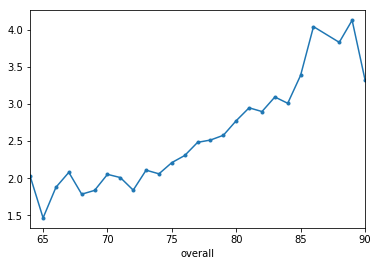

In [25]:
df = RQ1_Defenders.groupby(['overall']).mean()['Previous Average Form']
df.plot(style='.-')

In [26]:
RQ1_Defenders['Previous Average Form'].corr(RQ1_Defenders['overall'])

0.62626550414557913

In [27]:
worldclass_defenders = RQ1_Defenders[RQ1_Defenders['overall']>84]
average_defenders = RQ1_Defenders[RQ1_Defenders['overall']<85]

In [28]:
x = worldclass_defenders['overall'].values[:,np.newaxis]
y = worldclass_defenders['Previous Average Form'].values
worldclass_defenders_model = LinearRegression()
worldclass_defenders_model.fit(x, y)

w = average_defenders['overall'].values[:,np.newaxis]
z = average_defenders['Previous Average Form'].values
average_defenders_model = LinearRegression()
average_defenders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

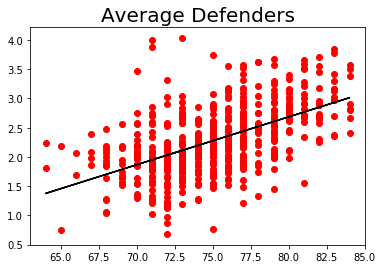

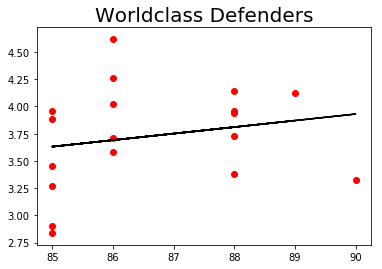

In [29]:
plt.scatter(w, z,color='r')
plt.plot(w, average_defenders_model.predict(w),color='k')
plt.title('Average Defenders', fontsize=20)
plt.show()

plt.scatter(x, y,color='r')
plt.plot(x, worldclass_defenders_model.predict(x),color='k')
plt.title('Worldclass Defenders', fontsize=20)
plt.show()

In [30]:
average_defenders["Distance"] = average_defenders['Previous Average Form'].values - average_defenders_model.predict(average_defenders['overall'].values[:,np.newaxis])
worldclass_defenders["Distance"] = worldclass_defenders['Previous Average Form'].values - worldclass_defenders_model.predict(worldclass_defenders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
pos_dist_def0 = average_defenders[average_defenders['Distance']>=0]['Distance'].mean()
pos_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']>=0]['Distance'].mean()

neg_dist_def0 = average_defenders[average_defenders['Distance']<0]['Distance'].mean()
neg_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']<0]['Distance'].mean()

In [32]:
underrated_average_def = average_defenders[average_defenders['Distance']>(pos_dist_def0*2)]
underrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']>pos_dist_def1]

overrated_average_def = average_defenders[average_defenders['Distance']<(neg_dist_def0*2)]
overrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']<neg_dist_def1]

In [33]:
underrated_average_def['Predicted Form (FIFA)'] = average_defenders_model.predict(underrated_average_def['overall'].values[:,np.newaxis])
underrated_worldclass_def['Predicted Form (FIFA)'] = worldclass_defenders_model.predict(underrated_worldclass_def['overall'].values[:,np.newaxis])

overrated_average_def['Predicted Form (FIFA)'] = average_defenders_model.predict(overrated_average_def['overall'].values[:,np.newaxis])
overrated_worldclass_def['Predicted Form (FIFA)'] = worldclass_defenders_model.predict(overrated_worldclass_def['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [34]:
underrated_average_def['Predicted Form (Us)'] = underrated_average_def['Previous Average Form']
underrated_worldclass_def['Predicted Form (Us)'] = underrated_worldclass_def['Previous Average Form']

overrated_average_def['Predicted Form (Us)'] = overrated_average_def['Previous Average Form']
overrated_worldclass_def['Predicted Form (Us)'] = overrated_worldclass_def['Previous Average Form']

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [35]:
underrated_defenders = pd.concat([underrated_average_def ,underrated_worldclass_def ],axis=0)

overrated_defenders = pd.concat([overrated_average_def ,overrated_worldclass_def ],axis=0)

In [36]:
underrated_defenders.sort_values('Distance', ascending=False).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Ashley Cole,LA Galaxy,USA Major League Soccer,36,England,Defender,71,71,270000.0,False,4.000000,0.000000,0.0,False,True,2.051494,1.948506,4.000000
1,Stoppila Sunzu,Arsenal Tula,Russian Premier League,28,Zambia,Defender,71,72,2200000.0,False,3.878788,0.000000,0.0,False,False,1.930282,1.948506,3.878788
2,Almamy Toure,AS Monaco,French Ligue 1,21,Mali,Defender,73,81,5000000.0,True,4.033333,0.000000,0.0,True,False,1.920929,2.112405,4.033333
3,Francois Clerc,GFC Ajaccio,French Ligue 2,34,France,Defender,70,70,500000.0,True,3.470588,0.000000,0.0,False,True,1.604031,1.866557,3.470588
4,Andrea Conti,Milan,Italian Serie A,23,Italy,Defender,75,83,10000000.0,False,3.744681,3.000000,2.0,True,True,1.468378,2.276303,3.744681
5,Rod Fanni,Olympique de Marseille,French Ligue 1,35,France,Defender,72,72,725000.0,False,3.318182,0.000000,0.0,True,True,1.287726,2.030455,3.318182
6,Gregory van der Wiel,Cagliari,Italian Serie A,29,Netherlands,Defender,76,76,6000000.0,False,3.555556,1.000000,5.0,True,False,1.197303,2.358253,3.555556
7,Lucas Hernandez,Atletico Madrid,Spanish Primera Division,21,France,Defender,77,88,13500000.0,False,3.576923,4.304348,23.0,True,True,1.136721,2.440202,3.576923
8,Adriano,Besiktas JK,Turkish Super Lig,32,Brazil,Defender,78,78,5500000.0,False,3.630137,0.000000,0.0,False,False,1.107986,2.522151,3.630137
9,Holger Badstuber,VfB Stuttgart,German Bundesliga,28,Germany,Defender,78,78,8500000.0,True,3.625000,2.913043,23.0,True,True,1.102849,2.522151,3.625000


In [37]:
overrated_defenders.sort_values('Distance', ascending=True).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Fernando Amorebieta,Independiente,Argentinian Superliga,32,Venezuela,Defender,75,75,3800000.0,False,0.770492,0.000000,0.0,False,False,-1.505811,2.276303,0.770492
1,Marco Capuano,Cagliari,Italian Serie A,25,Italy,Defender,72,76,3400000.0,False,0.679245,1.800000,20.0,True,True,-1.351210,2.030455,0.679245
2,Oscar Duarte,RCD Espanyol,Spanish Primera Division,28,Costa Rica,Defender,77,77,7000000.0,False,1.206897,2.727273,11.0,True,False,-1.233305,2.440202,1.206897
3,Sebastian Coates,Sporting CP,Portuguese Primeira Liga,26,Uruguay,Defender,81,83,18000000.0,False,1.548387,0.000000,0.0,False,False,-1.219612,2.767999,1.548387
4,Jorge Mere,1. FC Koln,German Bundesliga,20,Spain,Defender,78,84,12000000.0,False,1.339286,1.421053,19.0,True,True,-1.182865,2.522151,1.339286
5,Luca Ceppitelli,Cagliari,Italian Serie A,27,Italy,Defender,72,74,3000000.0,False,0.866667,2.136364,22.0,True,True,-1.163789,2.030455,0.866667
6,Oriol Romeu,Southampton,English Premier League,25,Spain,Defender,79,81,13000000.0,False,1.456522,0.000000,0.0,True,True,-1.147579,2.604100,1.456522
7,Gaston Silva,Independiente,Argentinian Superliga,23,Uruguay,Defender,72,77,3500000.0,False,0.974359,0.000000,0.0,False,False,-1.056096,2.030455,0.974359
8,Jordi Amat,Real Betis Balompie,Spanish Primera Division,25,Spain,Defender,77,83,10500000.0,False,1.481013,2.100000,20.0,True,True,-0.959189,2.440202,1.481013
9,Lasse Sobiech,FC St. Pauli,German 2. Bundesliga,26,Germany,Defender,74,75,5500000.0,False,1.264706,0.000000,0.0,False,True,-0.929648,2.194354,1.264706


## Midfielders

In [38]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

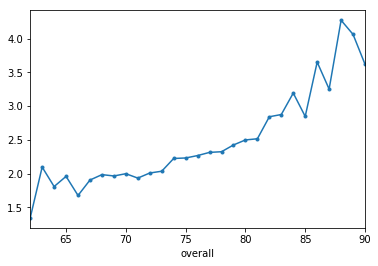

In [39]:
mid = RQ1_Midfielders.groupby(['overall']).mean()['Previous Average Form']
mid.plot(style='.-')

In [40]:
RQ1_Midfielders['Previous Average Form'].corr(RQ1_Midfielders['overall'])

0.56668684897250909

In [41]:
worldclass_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']>84]
average_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']<85]

In [42]:
x = worldclass_midfielders['overall'].values[:,np.newaxis]
y = worldclass_midfielders['Previous Average Form'].values
worldclass_midfielders_model = LinearRegression()
worldclass_midfielders_model.fit(x, y)

w = average_midfielders['overall'].values[:,np.newaxis]
z = average_midfielders['Previous Average Form'].values
average_midfielders_model = LinearRegression()
average_midfielders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

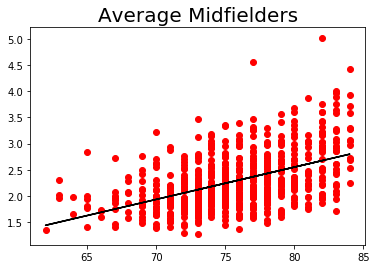

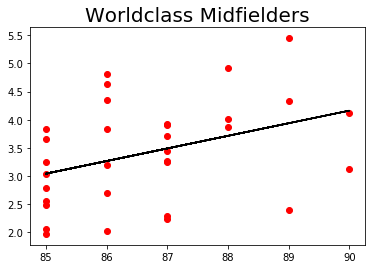

In [43]:
plt.scatter(w, z,color='r')
plt.plot(w, average_midfielders_model.predict(w),color='k')
plt.title('Average Midfielders', fontsize=20)
plt.show()

plt.scatter(x, y,color='r')
plt.plot(x, worldclass_midfielders_model.predict(x),color='k')
plt.title('Worldclass Midfielders', fontsize=20)
plt.show()

In [44]:
average_midfielders["Distance"] = average_midfielders['Previous Average Form'].values - average_midfielders_model.predict(average_midfielders['overall'].values[:,np.newaxis])
worldclass_midfielders["Distance"] = worldclass_midfielders['Previous Average Form'].values - worldclass_midfielders_model.predict(worldclass_midfielders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
pos_dist_mid0 = average_midfielders[average_midfielders['Distance']>=0]['Distance'].mean()
pos_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']>=0]['Distance'].mean()

neg_dist_mid0 = average_midfielders[average_midfielders['Distance']<0]['Distance'].mean()
neg_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']<0]['Distance'].mean()

In [46]:
underrated_average_mid = average_midfielders[average_midfielders['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']>pos_dist_mid1]

overrated_average_mid = average_midfielders[average_midfielders['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']<neg_dist_mid1]

In [47]:
underrated_average_mid['Predicted Form (FIFA)'] = average_midfielders_model.predict(underrated_average_mid['overall'].values[:,np.newaxis])
underrated_worldclass_mid['Predicted Form (FIFA)'] = worldclass_midfielders_model.predict(underrated_worldclass_mid['overall'].values[:,np.newaxis])

overrated_average_mid['Predicted Form (FIFA)'] = average_midfielders_model.predict(overrated_average_mid['overall'].values[:,np.newaxis])
overrated_worldclass_mid['Predicted Form (FIFA)'] = worldclass_midfielders_model.predict(overrated_worldclass_mid['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [48]:
underrated_average_mid['Predicted Form (Us)'] = underrated_average_mid['Previous Average Form']
underrated_worldclass_mid['Predicted Form (Us)'] = underrated_worldclass_mid['Previous Average Form']

overrated_average_mid['Predicted Form (Us)'] = overrated_average_mid['Previous Average Form']
overrated_worldclass_mid['Predicted Form (Us)'] = overrated_worldclass_mid['Previous Average Form']

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [49]:
underrated_midfielders = pd.concat([underrated_average_mid ,underrated_worldclass_mid ],axis=0)

overrated_midfielders = pd.concat([overrated_average_mid ,overrated_worldclass_mid ],axis=0)

In [50]:
underrated_midfielders.sort_values('Distance', ascending=False).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Max Kruse,SV Werder Bremen,German Bundesliga,29,Germany,Midfielder,82,82,22000000.0,False,5.017544,3.800000,25.0,True,True,2.344844,2.672700,5.017544
1,Alexander Meier,Eintracht Frankfurt,German Bundesliga,34,Germany,Midfielder,77,77,4700000.0,True,4.563025,0.000000,0.0,True,True,2.199240,2.363785,4.563025
2,Dele Alli,Tottenham Hotspur,English Premier League,21,England,Midfielder,84,90,43000000.0,False,4.428571,4.064516,31.0,True,True,1.632306,2.796266,4.428571
3,Marco Reus,Borussia Dortmund,German Bundesliga,28,Germany,Midfielder,86,86,45000000.0,True,4.806452,4.142857,7.0,True,True,1.540520,3.265931,4.806452
4,Gareth Bale,Real Madrid CF,Spanish Primera Division,27,Wales,Midfielder,89,89,69500000.0,True,5.451128,4.318182,22.0,True,False,1.513796,3.937332,5.451128
5,Franck Ribery,FC Bayern Munich,German Bundesliga,34,France,Midfielder,86,86,22500000.0,True,4.636364,3.052632,19.0,True,True,1.370432,3.265931,4.636364
6,Junior Stanislas,Bournemouth,English Premier League,27,England,Midfielder,73,73,4200000.0,False,3.476190,3.473684,19.0,True,True,1.359537,2.116653,3.476190
7,Tobias Werner,1. FC Nurnberg,German 2. Bundesliga,31,Germany,Midfielder,70,70,1600000.0,False,3.216981,0.000000,0.0,False,True,1.285677,1.931305,3.216981
8,Dimitri Payet,Olympique de Marseille,French Ligue 1,30,France,Midfielder,83,83,24500000.0,False,4.005780,0.000000,0.0,True,True,1.271298,2.734483,4.005780
9,Mario Gotze,Borussia Dortmund,German Bundesliga,25,Germany,Midfielder,81,85,22500000.0,False,3.867257,2.550000,20.0,True,True,1.256340,2.610917,3.867257


In [51]:
overrated_midfielders.sort_values('Distance', ascending=False).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Dominik Kohr,Bayer 04 Leverkusen,German Bundesliga,23,Germany,Midfielder,76,81,8500000.0,False,1.628866,1.541667,24.0,True,True,-0.673136,2.302002,1.628866
1,Amin Younes,Ajax,Holland Eredivisie,23,Germany,Midfielder,77,81,11500000.0,False,1.680000,0.000000,0.0,False,True,-0.683785,2.363785,1.680000
2,Javier Fuego,RCD Espanyol,Spanish Primera Division,33,Spain,Midfielder,80,80,6000000.0,False,1.864516,1.600000,25.0,True,True,-0.684618,2.549134,1.864516
3,Karim El Ahmadi,Feyenoord,Holland Eredivisie,32,Morocco,Midfielder,80,80,11000000.0,False,1.862745,0.000000,0.0,False,False,-0.686389,2.549134,1.862745
4,Kevin Vogt,TSG 1899 Hoffenheim,German Bundesliga,25,Germany,Midfielder,80,82,15000000.0,False,1.859155,1.703704,27.0,True,True,-0.689979,2.549134,1.859155
5,Idrissa Gana Gueye,Everton,English Premier League,27,Senegal,Midfielder,83,84,24500000.0,False,2.036364,2.034483,29.0,True,False,-0.698119,2.734483,2.036364
6,Jose Canas,PAOK Thessaloniki,Greek Super League,30,Spain,Midfielder,75,75,4900000.0,True,1.537634,0.000000,0.0,False,True,-0.702585,2.240219,1.537634
7,Mateo Kovacic,Real Madrid CF,Spanish Primera Division,23,Croatia,Midfielder,82,88,30000000.0,False,1.969466,1.529412,17.0,True,False,-0.703234,2.672700,1.969466
8,Sebastian Cristoforo,Fiorentina,Italian Serie A,23,Uruguay,Midfielder,76,80,8500000.0,True,1.588235,1.200000,5.0,True,False,-0.713767,2.302002,1.588235
9,Stefano Sturaro,Juventus,Italian Serie A,24,Italy,Midfielder,77,82,11500000.0,False,1.650000,1.454545,11.0,True,True,-0.713785,2.363785,1.650000


## Forwards

In [52]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

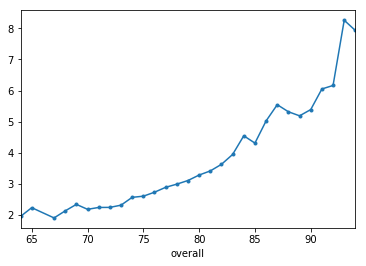

In [53]:
fwd = RQ1_Forwards.groupby(['overall']).mean()['Previous Average Form']
fwd.plot(style='.-')

In [54]:
RQ1_Forwards['Previous Average Form'].corr(RQ1_Forwards['overall'])

0.7831046835390989

In [55]:
worldclass_forwards = RQ1_Forwards[RQ1_Forwards['overall']>84]
average_forwards = RQ1_Forwards[RQ1_Forwards['overall']<85]

In [56]:
x = worldclass_forwards['overall'].values[:,np.newaxis]
y = worldclass_forwards['Previous Average Form'].values
worldclass_forwards_model = LinearRegression()
worldclass_forwards_model.fit(x, y)

w = average_forwards['overall'].values[:,np.newaxis]
z = average_forwards['Previous Average Form'].values
average_forwards_model = LinearRegression()
average_forwards_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

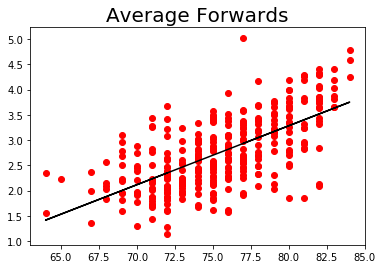

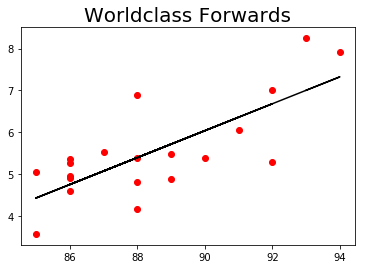

In [57]:
plt.scatter(w, z,color='r')
plt.plot(w, average_forwards_model.predict(w),color='k')
plt.title('Average Forwards', fontsize=20)
plt.show()

plt.scatter(x, y,color='r')
plt.plot(x, worldclass_forwards_model.predict(x),color='k')
plt.title('Worldclass Forwards', fontsize=20)
plt.show()

In [58]:
average_forwards["Distance"] = average_forwards['Previous Average Form'].values - average_forwards_model.predict(average_forwards['overall'].values[:,np.newaxis])
worldclass_forwards["Distance"] = worldclass_forwards['Previous Average Form'].values - worldclass_forwards_model.predict(worldclass_forwards['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
pos_dist_fwd0 = average_forwards[average_forwards['Distance']>=0]['Distance'].mean()
pos_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']>=0]['Distance'].mean()

neg_dist_fwd0 = average_forwards[average_forwards['Distance']<0]['Distance'].mean()
neg_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']<0]['Distance'].mean()

In [60]:
underrated_average_fwd = average_forwards[average_forwards['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']>pos_dist_mid1]

overrated_average_fwd = average_forwards[average_forwards['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']<neg_dist_mid1]

In [61]:
underrated_average_fwd['Predicted Form (FIFA)'] = average_forwards_model.predict(underrated_average_fwd['overall'].values[:,np.newaxis])
underrated_worldclass_fwd['Predicted Form (FIFA)'] = worldclass_forwards_model.predict(underrated_worldclass_fwd['overall'].values[:,np.newaxis])

overrated_average_fwd['Predicted Form (FIFA)'] = average_forwards_model.predict(overrated_average_fwd['overall'].values[:,np.newaxis])
overrated_worldclass_fwd['Predicted Form (FIFA)'] = worldclass_forwards_model.predict(overrated_worldclass_fwd['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [62]:
underrated_average_fwd['Predicted Form (Us)'] = underrated_average_fwd['Previous Average Form']
underrated_worldclass_fwd['Predicted Form (Us)'] = underrated_worldclass_fwd['Previous Average Form']

overrated_average_fwd['Predicted Form (Us)'] = overrated_average_fwd['Previous Average Form']
overrated_worldclass_fwd['Predicted Form (Us)'] = overrated_worldclass_fwd['Previous Average Form']

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [63]:
underrated_forwards = pd.concat([underrated_average_fwd ,underrated_worldclass_fwd ],axis=0)

overrated_forwards = pd.concat([overrated_average_fwd ,overrated_worldclass_fwd ],axis=0)

In [64]:
underrated_forwards.sort_values('Distance', ascending=False).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Robin van Persie,Fenerbahce SK,Turkish Super Lig,33,Netherlands,Forward,77,77,5500000.0,True,5.023256,0.000000,0.0,False,False,2.089209,2.934047,5.023256
1,Zlatan Ibrahimovic,Manchester United,English Premier League,35,Sweden,Forward,88,88,27000000.0,False,6.900000,1.200000,5.0,True,False,1.500181,5.399819,6.900000
2,German Denis,Club Atletico Lanus,Argentinian Superliga,35,Argentina,Forward,72,72,1400000.0,False,3.675000,0.000000,0.0,False,False,1.325258,2.349742,3.675000
3,Lionel Messi,FC Barcelona,Spanish Primera Division,30,Argentina,Forward,93,93,105000000.0,False,8.255952,7.375000,32.0,True,False,1.251361,7.004592,8.255952
4,Ikechukwu Uche,Gimnastic de Tarragona,Spanish Segunda Division,33,Nigeria,Forward,71,71,1500000.0,True,3.446429,0.000000,0.0,False,False,1.213548,2.232881,3.446429
5,Dario Cvitanich,Banfield,Argentinian Superliga,33,Argentina,Forward,76,76,4800000.0,False,3.942029,0.000000,0.0,False,False,1.124843,2.817186,3.942029
6,Charlie Austin,Southampton,English Premier League,27,England,Forward,78,78,11000000.0,True,4.175439,3.000000,20.0,True,True,1.124531,3.050908,4.175439
7,Mustapha Yatabare,Kardemir Karabukspor,Turkish Super Lig,31,Mali,Forward,69,69,950000.0,False,3.095238,0.000000,0.0,False,False,1.096079,1.999159,3.095238
8,Javi Guerra,Rayo Vallecano,Spanish Segunda Division,35,Spain,Forward,72,72,1400000.0,False,3.427273,0.000000,0.0,False,True,1.077531,2.349742,3.427273
9,Gonzalo Bergessio,Velez Sarsfield,Argentinian Superliga,32,Argentina,Forward,71,71,1900000.0,False,3.282353,0.000000,0.0,False,False,1.049472,2.232881,3.282353


In [65]:
overrated_forwards.sort_values('Distance', ascending=True).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Andres Guardado,Real Betis Balompie,Spanish Primera Division,30,Mexico,Forward,81,81,16500000.0,False,1.846154,2.851852,27.0,True,False,-1.555337,3.401491,1.846154
1,Manu Trigueros,Villarreal CF,Spanish Primera Division,25,Spain,Forward,82,85,27500000.0,False,2.094891,2.166667,30.0,True,True,-1.423461,3.518352,2.094891
2,Jonathan Dos Santos,LA Galaxy,USA Major League Soccer,27,Mexico,Forward,80,81,16500000.0,True,1.863158,0.000000,0.0,False,False,-1.421472,3.284630,1.863158
3,Yacine Brahimi,FC Porto,Portuguese Primeira Liga,27,Algeria,Forward,82,82,23000000.0,False,2.129032,0.000000,0.0,False,False,-1.389319,3.518352,2.129032
4,Neymar,Paris Saint-Germain,French Ligue 1,25,Brazil,Forward,92,94,123000000.0,False,5.306452,0.000000,0.0,True,False,-1.377186,6.683637,5.306452
5,Ricardo Horta,SC Braga,Portuguese Primeira Liga,22,Portugal,Forward,76,83,11000000.0,False,1.574468,0.000000,0.0,False,False,-1.242718,2.817186,1.574468
6,Paulo Dybala,Juventus,Italian Serie A,23,Argentina,Forward,88,93,79000000.0,False,4.166667,5.821429,28.0,True,False,-1.233153,5.399819,4.166667
7,Samuele Longo,CD Tenerife,Spanish Segunda Division,25,Italy,Forward,72,76,4100000.0,False,1.136364,0.000000,0.0,False,True,-1.213378,2.349742,1.136364
8,Jozy Altidore,Toronto FC,USA Major League Soccer,27,United States,Forward,76,76,8000000.0,True,1.619048,0.000000,0.0,False,False,-1.198138,2.817186,1.619048
9,Arkadiusz Milik,Napoli,Italian Serie A,23,Poland,Forward,79,86,18000000.0,True,2.024390,2.700000,10.0,True,False,-1.143379,3.167769,2.024390


In [66]:
underrated_players = pd.concat([underrated_defenders,underrated_midfielders,underrated_forwards], axis=0).reset_index().drop('index',1)
underrated_players = underrated_players.sort_values('Distance', ascending=False).reset_index().drop('index',1)

In [67]:
underrated_players.head(10)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Max Kruse,SV Werder Bremen,German Bundesliga,29,Germany,Midfielder,82,82,22000000.0,False,5.017544,3.800000,25.0,True,True,2.344844,2.672700,5.017544
1,Alexander Meier,Eintracht Frankfurt,German Bundesliga,34,Germany,Midfielder,77,77,4700000.0,True,4.563025,0.000000,0.0,True,True,2.199240,2.363785,4.563025
2,Robin van Persie,Fenerbahce SK,Turkish Super Lig,33,Netherlands,Forward,77,77,5500000.0,True,5.023256,0.000000,0.0,False,False,2.089209,2.934047,5.023256
3,Ashley Cole,LA Galaxy,USA Major League Soccer,36,England,Defender,71,71,270000.0,False,4.000000,0.000000,0.0,False,True,2.051494,1.948506,4.000000
4,Stoppila Sunzu,Arsenal Tula,Russian Premier League,28,Zambia,Defender,71,72,2200000.0,False,3.878788,0.000000,0.0,False,False,1.930282,1.948506,3.878788
5,Almamy Toure,AS Monaco,French Ligue 1,21,Mali,Defender,73,81,5000000.0,True,4.033333,0.000000,0.0,True,False,1.920929,2.112405,4.033333
6,Dele Alli,Tottenham Hotspur,English Premier League,21,England,Midfielder,84,90,43000000.0,False,4.428571,4.064516,31.0,True,True,1.632306,2.796266,4.428571
7,Francois Clerc,GFC Ajaccio,French Ligue 2,34,France,Defender,70,70,500000.0,True,3.470588,0.000000,0.0,False,True,1.604031,1.866557,3.470588
8,Marco Reus,Borussia Dortmund,German Bundesliga,28,Germany,Midfielder,86,86,45000000.0,True,4.806452,4.142857,7.0,True,True,1.540520,3.265931,4.806452
9,Gareth Bale,Real Madrid CF,Spanish Primera Division,27,Wales,Midfielder,89,89,69500000.0,True,5.451128,4.318182,22.0,True,False,1.513796,3.937332,5.451128


In [68]:
underrated_players.mean()['age']

29.116504854368934

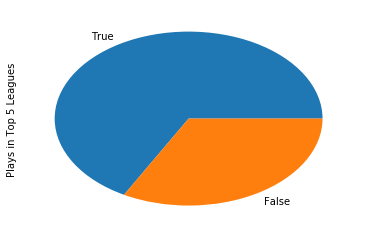

In [69]:
underrated_players['Plays in Top 5 Leagues'].value_counts().plot(kind='pie')

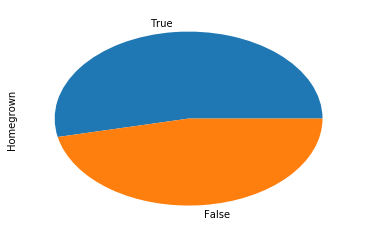

In [70]:
underrated_players['Homegrown'].value_counts().plot(kind='pie')

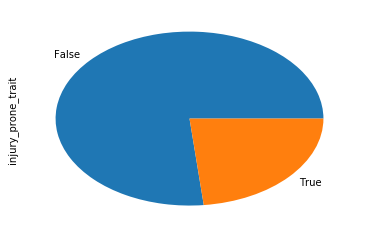

In [71]:
underrated_players.injury_prone_trait.value_counts().plot(kind='pie')

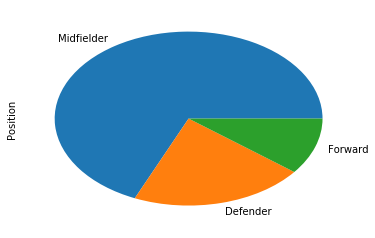

In [88]:
underrated_players['Position'].value_counts().plot(kind='pie')

In [72]:
overrated_players = pd.concat([overrated_defenders,overrated_midfielders,overrated_forwards], axis=0).reset_index().drop('index',1)
overrated_players = overrated_players.sort_values('Distance', ascending=True).reset_index().drop('index',1)

In [73]:
overrated_players.head(10)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Andres Guardado,Real Betis Balompie,Spanish Primera Division,30,Mexico,Forward,81,81,16500000.0,False,1.846154,2.851852,27.0,True,False,-1.555337,3.401491,1.846154
1,Luka Modric,Real Madrid CF,Spanish Primera Division,31,Croatia,Midfielder,89,89,57000000.0,False,2.400000,2.608696,23.0,True,False,-1.537332,3.937332,2.400000
2,Fernando Amorebieta,Independiente,Argentinian Superliga,32,Venezuela,Defender,75,75,3800000.0,False,0.770492,0.000000,0.0,False,False,-1.505811,2.276303,0.770492
3,Manu Trigueros,Villarreal CF,Spanish Primera Division,25,Spain,Forward,82,85,27500000.0,False,2.094891,2.166667,30.0,True,True,-1.423461,3.518352,2.094891
4,Jonathan Dos Santos,LA Galaxy,USA Major League Soccer,27,Mexico,Forward,80,81,16500000.0,True,1.863158,0.000000,0.0,False,False,-1.421472,3.284630,1.863158
5,Yacine Brahimi,FC Porto,Portuguese Primeira Liga,27,Algeria,Forward,82,82,23000000.0,False,2.129032,0.000000,0.0,False,False,-1.389319,3.518352,2.129032
6,Neymar,Paris Saint-Germain,French Ligue 1,25,Brazil,Forward,92,94,123000000.0,False,5.306452,0.000000,0.0,True,False,-1.377186,6.683637,5.306452
7,Marco Capuano,Cagliari,Italian Serie A,25,Italy,Defender,72,76,3400000.0,False,0.679245,1.800000,20.0,True,True,-1.351210,2.030455,0.679245
8,Marco Verratti,Paris Saint-Germain,French Ligue 1,24,Italy,Midfielder,87,91,64500000.0,False,2.231343,0.000000,0.0,True,True,-1.258388,3.489731,2.231343
9,Sergio Busquets,FC Barcelona,Spanish Primera Division,28,Spain,Midfielder,86,86,36000000.0,False,2.018293,2.240000,25.0,True,True,-1.247639,3.265931,2.018293


In [74]:
overrated_players.mean()['age']

26.282051282051281

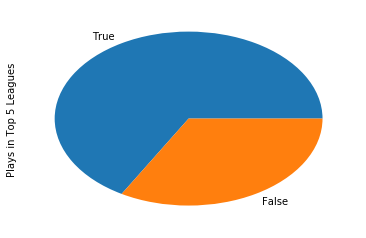

In [75]:
overrated_players['Plays in Top 5 Leagues'].value_counts().plot(kind='pie')

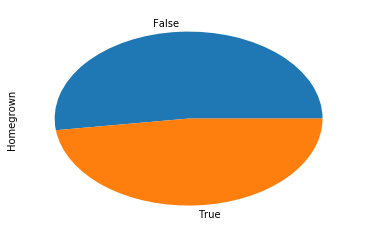

In [76]:
overrated_players['Homegrown'].value_counts().plot(kind='pie')

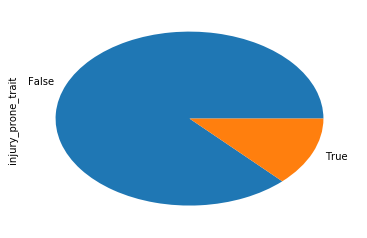

In [77]:
overrated_players.injury_prone_trait.value_counts().plot(kind='pie')

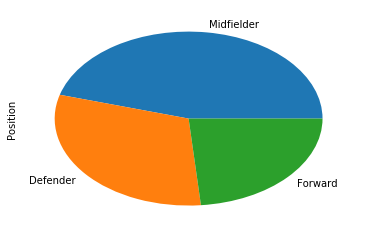

In [87]:
overrated_players['Position'].value_counts().plot(kind='pie')

# Part 2

In [78]:
underrated_players = underrated_players[underrated_players['Apps This Season']>0]
overrated_players = overrated_players[overrated_players['Apps This Season']>0]

In [79]:
underrated_players['FIFA'] = abs(underrated_players['Current Average Form'] - underrated_players['Predicted Form (FIFA)'])
underrated_players['Us'] = abs(underrated_players['Current Average Form'] - underrated_players['Predicted Form (Us)'])

In [80]:
underrated_players.loc[underrated_players['FIFA']<underrated_players['Us'],'Verdict'] = 'FIFA'
underrated_players.loc[underrated_players['FIFA']>underrated_players['Us'],'Verdict'] = 'Us'
underrated_players.loc[underrated_players['FIFA'] == underrated_players['Us'],'Verdict'] = 'Same'

Text(0.5,1,'Underrated Players')

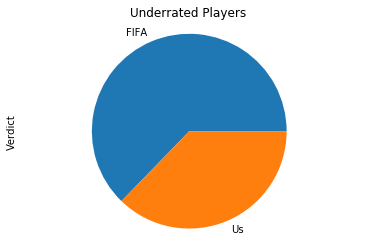

In [81]:
underrated_players.Verdict.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Underrated Players')

In [82]:
underrated_players = underrated_players[underrated_players['Verdict']=='Us']
underrated_players.head(10)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,...,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us),FIFA,Us,Verdict
6,Dele Alli,Tottenham Hotspur,English Premier League,21,England,Midfielder,84,90,43000000.0,False,...,4.064516,31.0,True,True,1.632306,2.796266,4.428571,1.268250,0.364055,Us
8,Marco Reus,Borussia Dortmund,German Bundesliga,28,Germany,Midfielder,86,86,45000000.0,True,...,4.142857,7.0,True,True,1.540520,3.265931,4.806452,0.876926,0.663594,Us
13,Junior Stanislas,Bournemouth,English Premier League,27,England,Midfielder,73,73,4200000.0,False,...,3.473684,19.0,True,True,1.359537,2.116653,3.476190,1.357031,0.002506,Us
25,Roberto Firmino,Liverpool,English Premier League,25,Brazil,Midfielder,83,86,33000000.0,False,...,4.757576,33.0,True,False,1.156426,2.734483,3.890909,2.023093,0.866667,Us
26,Sadio Mane,Liverpool,English Premier League,25,Senegal,Midfielder,84,87,39000000.0,False,...,4.461538,26.0,True,False,1.139904,2.796266,3.936170,1.665273,0.525368,Us
27,Lucas Hernandez,Atletico Madrid,Spanish Primera Division,21,France,Defender,77,88,13500000.0,False,...,4.304348,23.0,True,True,1.136721,2.440202,3.576923,1.864146,0.727425,Us
37,James Rodriguez,FC Bayern Munich,German Bundesliga,25,Colombia,Midfielder,86,89,56000000.0,False,...,4.550000,20.0,True,False,1.091212,3.265931,4.357143,1.284069,0.192857,Us
46,Mauro Icardi,Inter,Italian Serie A,24,Argentina,Forward,84,89,42000000.0,False,...,6.448276,29.0,True,False,1.041475,3.752074,4.793548,2.696202,1.654727,Us
63,Alejandro Dario Gomez,Atalanta,Italian Serie A,29,Argentina,Midfielder,84,84,31000000.0,False,...,3.714286,28.0,True,False,0.921292,2.796266,3.717557,0.918020,0.003272,Us
64,Anthony Martial,Manchester United,English Premier League,21,France,Midfielder,82,90,33000000.0,False,...,3.714286,28.0,True,True,0.920520,2.672700,3.593220,1.041586,0.121065,Us


In [83]:
overrated_players['FIFA'] = abs(overrated_players['Current Average Form'] - overrated_players['Predicted Form (FIFA)'])
overrated_players['Us'] = abs(overrated_players['Current Average Form'] - overrated_players['Predicted Form (Us)'])

In [84]:
overrated_players.loc[overrated_players['FIFA']<overrated_players['Us'],'Verdict'] = 'FIFA'
overrated_players.loc[overrated_players['FIFA']>overrated_players['Us'],'Verdict'] = 'Us'
overrated_players.loc[overrated_players['FIFA'] == overrated_players['Us'],'Verdict'] = 'Same'

Text(0.5,1,'Overrated Players')

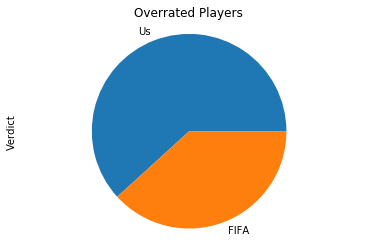

In [85]:
overrated_players.Verdict.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Overrated Players')

In [86]:
overrated_players[overrated_players['Verdict']=='Us'].head(10)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,...,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us),FIFA,Us,Verdict
1,Luka Modric,Real Madrid CF,Spanish Primera Division,31,Croatia,Midfielder,89,89,57000000.0,False,...,2.608696,23.0,True,False,-1.537332,3.937332,2.400000,1.328636,0.208696,Us
3,Manu Trigueros,Villarreal CF,Spanish Primera Division,25,Spain,Forward,82,85,27500000.0,False,...,2.166667,30.0,True,True,-1.423461,3.518352,2.094891,1.351685,0.071776,Us
9,Sergio Busquets,FC Barcelona,Spanish Primera Division,28,Spain,Midfielder,86,86,36000000.0,False,...,2.240000,25.0,True,True,-1.247639,3.265931,2.018293,1.025931,0.221707,Us
15,N'Golo Kante,Chelsea,English Premier League,26,France,Midfielder,87,90,52500000.0,False,...,2.166667,30.0,True,True,-1.205328,3.489731,2.284404,1.323065,0.117737,Us
17,Jorge Mere,1. FC Koln,German Bundesliga,20,Spain,Defender,78,84,12000000.0,False,...,1.421053,19.0,True,True,-1.182865,2.522151,1.339286,1.101098,0.081767,Us
23,Erik Moran,CD Leganes,Spanish Primera Division,26,Spain,Forward,72,76,3300000.0,False,...,1.000000,6.0,True,True,-1.073880,2.349742,1.275862,1.349742,0.275862,Us
25,Toni Kroos,Real Madrid CF,Spanish Primera Division,27,Germany,Midfielder,90,90,79000000.0,False,...,3.521739,23.0,True,True,-1.041132,4.161132,3.120000,0.639393,0.401739,Us
26,John Guidetti,RC Celta de Vigo,Spanish Primera Division,25,Sweden,Forward,79,83,16500000.0,False,...,2.333333,21.0,True,False,-1.027144,3.167769,2.140625,0.834435,0.192708,Us
27,Javier Mascherano,FC Barcelona,Spanish Primera Division,33,Argentina,Midfielder,83,83,10500000.0,False,...,1.857143,7.0,True,False,-1.024338,2.734483,1.710145,0.877340,0.146998,Us
29,Recio,Malaga CF,Spanish Primera Division,26,Spain,Forward,77,81,9500000.0,False,...,2.045455,22.0,True,True,-0.987893,2.934047,1.946154,0.888592,0.099301,Us
